# Visualizing Titanic Data

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [113]:
# first, need our imports and to grab the data
import pandas as pd

import matplotlib.pyplot as plt

In [114]:
!ls data/

Austin_Animal_Center_Intakes_030921.csv
Austin_Animal_Center_Outcomes_030921.csv
flights.db
titanic.csv


In [115]:
df = pd.read_csv('data/titanic.csv')

In [116]:
# what's in the data?
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [118]:
df['Fare'].max()

512.3292

In [119]:
df.loc[df['Fare'] == df['Fare'].max()]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C

In [120]:
df.sort_values(by='Fare', ascending=False)

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1          Fortune, Miss. Mabel Helen   
27            28         0       1      Fortune, Mr. Charles Alexander   
..           ...       ...     ...                                 ...   
633          634         0       1       Parr, Mr. William Henry Marsh   
413          414         0       2      Cunningham, Mr. Alfred Fleming   
822          823         0       1     Reuchlin, Jonkheer. John George   
732          733         0       2                Knight, Mr. Robert J   
674          675         0       2          Watson, Mr. Ennis Hastings   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
88   female  23.0      3      2     19950  263.0000  C23 C25 C27        S  
27     male  19.0      3      2     19950  263.0000  C23 C25 C27        S  
..      ...   ...    ...    ...       ...       ...          ...      ...  
633    male   NaN      0      0    112052    0.0000          NaN        S  
413    male   NaN      0      0    239853    0.0000          NaN        S  
822    male  38.0      0      0     19972    0.0000          NaN        S  
732    male   NaN      0      0    239855    0.0000          NaN        S  
674    male   NaN      0      0    239856    0.0000          NaN        S  

[891 rows x 12 columns]

And let's visualize some more!

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

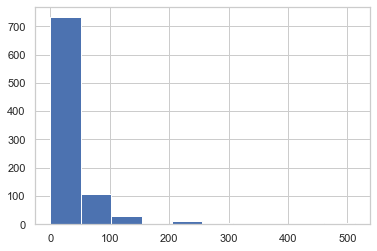

In [121]:
# Plot a histogram - but now, let's do all fares
plt.hist(df['Fare'])

<AxesSubplot:ylabel='Frequency'>

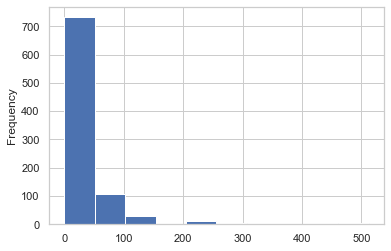

In [122]:
df['Fare'].plot(kind='hist')

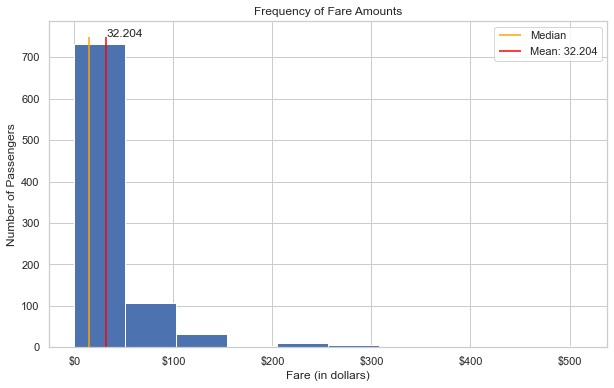

In [125]:
# Okay that's pretty bland, let's see if we can add more detail
from matplotlib import ticker

plt.figure(figsize=(10,6))

fare_mean = df['Fare'].mean()

plt.hist(df['Fare'])
plt.vlines(x=df['Fare'].median(), ymin=0, ymax=750, color='orange', label='Median')
plt.vlines(x=df['Fare'].mean(), ymin=0, ymax=750, color='red', label=f'Mean: {fare_mean:.3f}')

ax = plt.gca()

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))

ax.annotate(f"{fare_mean:.3f}", (fare_mean, 750))

plt.title('Frequency of Fare Amounts')
plt.xlabel('Fare (in dollars)')
plt.ylabel('Number of Passengers')

plt.legend()
plt.show()

### What are the Most Common Last Names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [42]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [45]:
# Need to grab last names ... but how?
df['Name'].str.split(", ").str[0]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [50]:
ln_list = []

for row in df.index:
    ln_list.append(df['Name'][row].split(", ")[0])

In [52]:
pd.Series(ln_list)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Length: 891, dtype: object

In [55]:
pd.Series([df['Name'][row].split(", ")[0] for row in df.index])

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Length: 891, dtype: object

In [56]:
df['Last Name'] = df['Name'].map(lambda x: x.split(", ")[0])

In [57]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Last Name  
0      0         A/5 21171   7.2500   NaN        S     Braund  
1      0          PC 17599  71.2833   C85        C    Cumings  
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen  
3      0            113803  53.1000  C123        S   Futrelle  
4      0            373450   8.0500   NaN        S      Allen

`groupby` or `value_counts`?

In [63]:
df.groupby('Last Name').count()['PassengerId'].sort_values(ascending=False)

Last Name
Andersson    9
Sage         7
Skoog        6
Johnson      6
Panula       6
            ..
Murdlin      1
Mullens      1
Mudd         1
Moutal       1
Abbing       1
Name: PassengerId, Length: 667, dtype: int64

In [68]:
common_ln = df['Last Name'].value_counts().head(8)

In [72]:
common_ln.index

Index(['Andersson', 'Sage', 'Carter', 'Johnson', 'Panula', 'Skoog', 'Goodwin',
       'Rice'],
      dtype='object')

Now let's visualize:

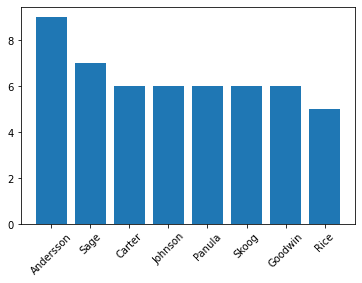

In [75]:
# Plot a bar graph of the most common last names
plt.bar(x=common_ln.index, height=common_ln)
plt.xticks(rotation=45)
plt.show()

### Make it Pop!

In [77]:
num_passengers = len(df)

In [127]:
common_ln/ num_passengers

Andersson    0.010101
Sage         0.007856
Carter       0.006734
Johnson      0.006734
Panula       0.006734
Skoog        0.006734
Goodwin      0.006734
Rice         0.005612
Name: Last Name, dtype: float64

In [80]:
common_ln_expanded = pd.DataFrame(common_ln)

In [82]:
common_ln_expanded['Percentages'] = common_ln_expanded['Last Name']/ num_passengers

In [135]:
common_ln_expanded.index[0]

'Andersson'

In [93]:
common_ln_expanded

Last Name  Percentages
Andersson          9     0.010101
Sage               7     0.007856
Carter             6     0.006734
Johnson            6     0.006734
Panula             6     0.006734
Skoog              6     0.006734
Goodwin            6     0.006734
Rice               5     0.005612

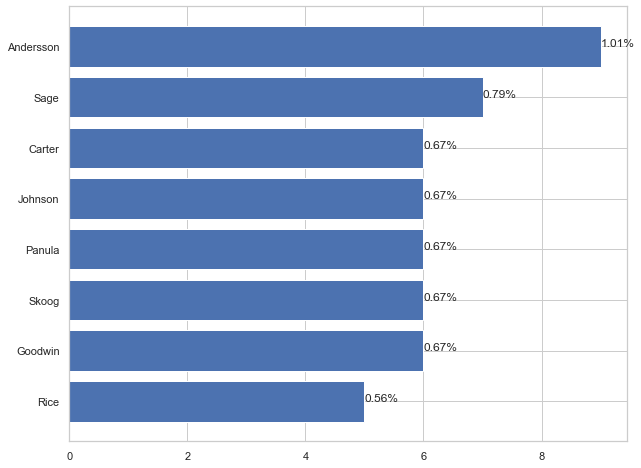

In [142]:
# Add percentages to the end of each bar
plt.figure(figsize=(10,8))

plt.barh(common_ln.index, common_ln)

ax=plt.gca()

ax.invert_yaxis()

# Old way!
# # Leaving this code for me... need to change None to whatever we named things
# # This tricky bit of code annotates percentages on the chart
# y = 0 # our start point on our y axis for the details
# # Doing this for each last name
# for y in common_ln_expanded.index:
#     x = common_ln_expanded['Last Name'][row]
#     # grabbing the percentage of the passengers with that last name
#     ln_perc = common_ln_expanded['Percentages'][row] * 100
#     # formatting with f-strings for readability
#     percentage = f'{ln_perc:.2f}%' 
#     # annotating the chart, locating the annotation at the name and our y height
#     ax.annotate(percentage,(x, y))
#     # adding 1 to our y for the next name
#     y += 1

# Better way! Note we no longer are using the df, just using the series common_ln

ln_percs = list(common_ln / num_passengers)

for y in range(len(common_ln)):
    x = common_ln[y]
    ln_perc = ln_percs[y] * 100
    percentage = f"{ln_perc:.2f}%"
    ax.annotate(percentage, (x, y))

# plt.xticks(rotation=45)
plt.show()

## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [100]:
import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')

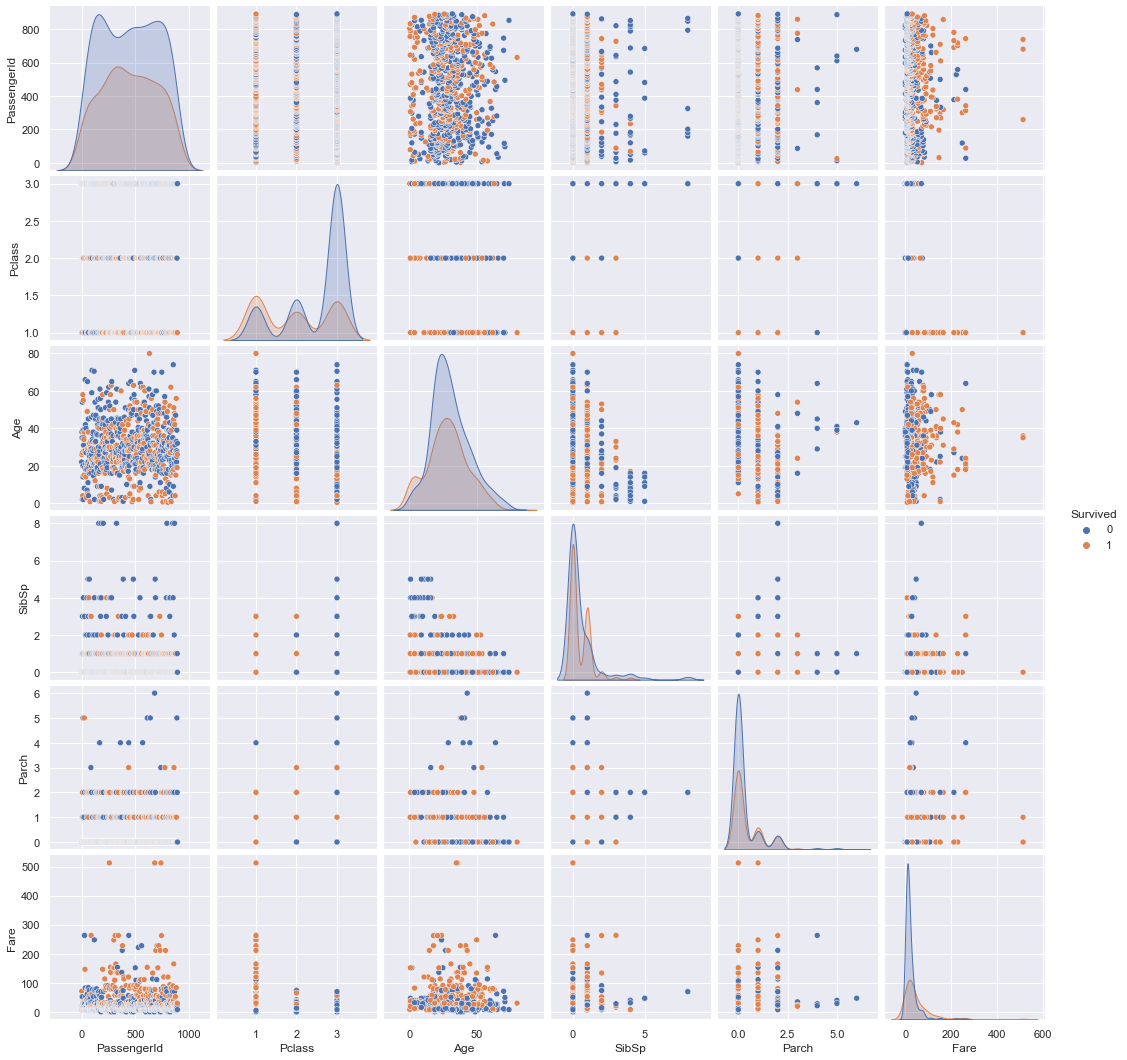

In [101]:
# Let's take a look at how these columns overlap
sns.pairplot(df, hue='Survived')

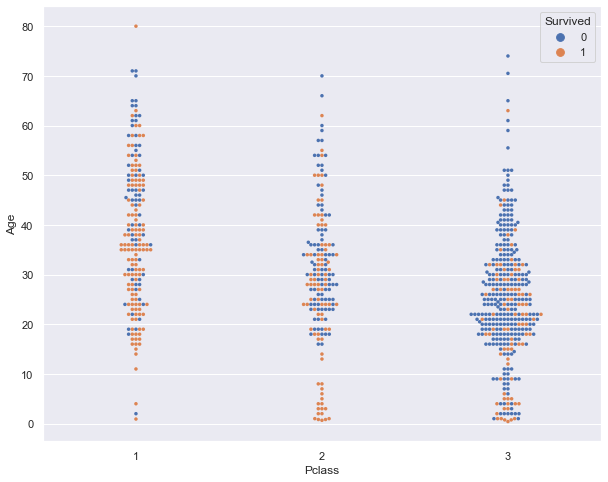

In [104]:
# Try out a swarm plot with class and age
plt.figure(figsize=(10,8))
sns.swarmplot(x='Pclass', y='Age', data=df, 
              hue='Survived', size=3.5)
plt.show()

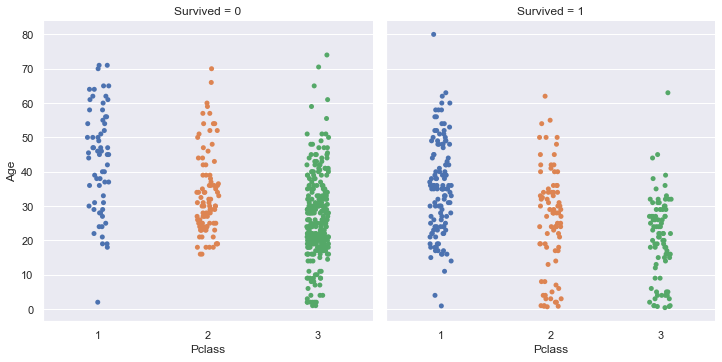

In [105]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
sns.catplot(x='Pclass', y='Age', data=df, col='Survived')

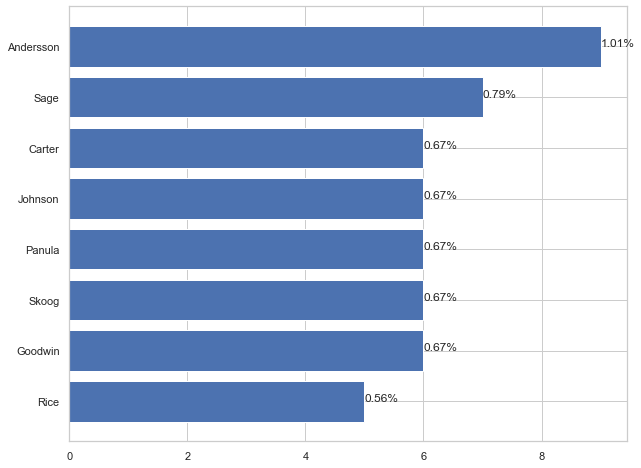

In [111]:
# Also, now that we've set the style for our plots, 
# let's see what a previous matplotlib plot looks like
sns.set(style='whitegrid')
# Add percentages to the end of each bar
plt.figure(figsize=(10,8))

plt.barh(common_ln.index, common_ln)

ax=plt.gca()

ax.invert_yaxis()

# Leaving this code for me... need to change None to whatever we named things
# This tricky bit of code annotates percentages on the chart
y = 0 # our start point on our y axis for the details
# Doing this for each last name
for row in common_ln_expanded.index:
    x = common_ln_expanded['Last Name'][row]
    # grabbing the percentage of the passengers with that last name
    ln_perc = common_ln_expanded['Percentages'][row] * 100
    # formatting with f-strings for readability
    percentage = f'{ln_perc:.2f}%' 
    # annotating the chart, locating the annotation at the name and our y height
    ax.annotate(percentage,(x, y))
    # adding 1 to our y for the next name
    y += 1

plt.savefig("example_horizontal_barchart_with_percentages.png")
    
# plt.xticks(rotation=45)
plt.show()

## If we have time...

In [109]:
# plotly
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
                 size="pop", color="continent",
                 hover_name="country", size_max=60)
fig.show()

In [110]:
# folium
import folium

m = folium.Map(location=[45.5236, -122.6750], zoom_start=13)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup="The Waterfront",
    color="crimson",
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup="Laurelhurst Park",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)

m

## Resources

### Other Python Libraries:

- [Plotly Express in Python](https://plotly.com/python/plotly-express/)
    - please note, not all Plotly visualizations are as easy as plotly express, but have fun exploring
- [Folium](https://python-visualization.github.io/folium/quickstart.html)
    - used to be restricted as to how many rows would work well, but I've heard it's gotten better at handling bigger data

### Resources from the slides:

- Visualization Types/examples (often with example code):
    - https://datavizproject.com/
    - https://python-graph-gallery.com/ 
    - https://seaborn.pydata.org/examples/index.html
    
    
    
- Visualization Inspiration:
    - https://www.reddit.com/r/dataisbeautiful/top/?t=all
    - https://informationisbeautiful.net/
    - https://pudding.cool/


- [Python Matplotlib guide (the theory of matplotlib, with examples)](https://realpython.com/python-matplotlib-guide/)
- [The best Seaborn tutorial, through Pokemon stats](https://elitedatascience.com/python-seaborn-tutorial)
- [2010 TED Talk on data visualization from Information is Beautiful](https://www.ted.com/talks/david_mccandless_the_beauty_of_data_visualization)
    - don’t have 20 minutes? check out the last 8, on perspective, [here](https://www.ted.com/talks/david_mccandless_the_beauty_of_data_visualization#t-611279)
